# CMPT 423/820 
## Assignment 2 Question 3
* Seyedeh Mina Mousavifar
* 11279515
* sem311

In [51]:
import pandas as pd
from sklearn.datasets import load_wine

# add the correct header from wine dataset
header = ['label'] + load_wine()['feature_names'] 
    

# reading dataset and adding header
wine = pd.read_csv('data/a2q3.csv', 
                   header=None, 
                   names=header)

# separating labels
labels = wine.values[:, 0]
data = wine.values[:, 1:]

K_FOLD = 10

# creating answer
models_info = {'KNN': None, 
              'NB': None, 
              'DT': None}

### Part 1.

K-Nearest Neighbours Classifier. Remember that you’ll have to choose K.

> I divided data into the training set and test set and then applied cross-validation on the training set to tune K hyperparameter. However, I realized that due to the small size of our data, the best K with the highest f1-score is highly relying on the division. So, I did cross-validation for optimizing K and return the f1-score on all of the data.

> We optimize K by choosing maximum f1-score for different ranges of K. Futher, we calculate f1-score for each K based on the average of 10-fold cross validation. An approach to select range of K is set $K = \sqrt{n}$ based on this [article](https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/). 

#### Finding best K

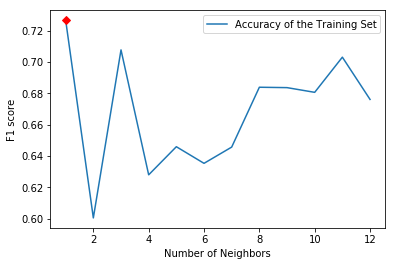

Maximum F1 score is for k = 1 with score of 0.7265652112478737 .


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import math
import matplotlib.pyplot as plt


def nb_classifier(k_in, data_in, label_in):
    """
    :purpose: This function creates an KNN classifier and calculates 
    its training and test accuracy.
    :param k_in: number of nearest neighbors
    :param data_in: training dataset
    :param label_in: true answers for the training dataset
    :return: the accuracy of the model on training set
    """
    
     # creating the KNN classifier
    clf_knn = KNeighborsClassifier(n_neighbors=k_in)
    
    # cross validation 
    train_result = cross_val_score(clf_knn, data_in, 
                                   label_in, cv=K_FOLD, 
                                   scoring='f1_macro')
    
    # return mean of f1 score
    return train_result.mean()


# saving accuracy for different K
training_accuracy = list()

# range of K for knn
k_range = round(math.sqrt(data.shape[0]))
neighbors_settings = range(1, k_range)

for n_neighbors in neighbors_settings:
    result = nb_classifier(n_neighbors, 
                           data, labels)
    
    training_accuracy.append(result)
    

# plotting result
plt.plot(neighbors_settings, training_accuracy,
         label='Accuracy of the Training Set')

# highlighting maximum point
max_point = max(training_accuracy)
max_k = training_accuracy.index(max_point) + 1
plt.plot(max_k, max_point, 'rD')
plt.ylabel('F1 score')
plt.xlabel('Number of Neighbors')
plt.legend()
plt.show()

print('Maximum F1 score is for k =', max_k, 'with score of', max_point, '.')

#### 1-Nearest Neighbours Classifier

In [53]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

# creating the KNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=max_k)

# cross validation

# f1 score
result = cross_val_score(clf_knn, data, 
                        labels, cv=K_FOLD, 
                        scoring='f1_macro')
# accuracy
acc = cross_val_score(clf_knn, data, 
                      labels, cv=K_FOLD, 
                      scoring='balanced_accuracy')

# saving answer
models_info['KNN'] = {'f1': round(result.mean(), 5),
                      'std': round(result.std(), 5),
                      'acc': round(acc.mean(), 5)}

# printing result in tabular format
print('\033[1m' + 'KNN classifier for K=1' + '\033[0m')
print('{:<15} {:<15} {:<15}'.format('F1-score Mean',
                                    'F1-score STD',
                                    'Accuracy'))

print('{:<15} {:<15} {:<15}'.format(models_info['KNN']['f1'], 
                                    models_info['KNN']['std'],
                                    models_info['KNN']['acc']))

KNN classifier for K=1
F1-score Mean   F1-score STD    Accuracy       
0.72657         0.10744         0.73409        


### Part 2.

Naive Bayes Classifier.

In [54]:
from sklearn.naive_bayes import GaussianNB

# creating the KNN classifier
clf_nb = GaussianNB()

# cross validation 
result = cross_val_score(clf_nb, data, 
                        labels, cv=K_FOLD, 
                        scoring='f1_macro')
# accuracy
acc = cross_val_score(clf_nb, data, 
                      labels, cv=K_FOLD, 
                      scoring='balanced_accuracy')

# saving answer
models_info['NB'] = {'f1': round(result.mean(), 5),
                      'std': round(result.std(), 5),
                      'acc': round(acc.mean(), 5)}

# printing result in tabular format
print('\033[1m' + 'Naive Bayes classifier' + '\033[0m')
print('{:<15} {:<15} {:<15}'.format('F1-score Mean',
                                    'F1-score STD',
                                    'Accuracy'))

print('{:<15} {:<15} {:<15}'.format(models_info['NB']['f1'], 
                                    models_info['NB']['std'],
                                    models_info['NB']['acc']))

Naive Bayes classifier
F1-score Mean   F1-score STD    Accuracy       
0.97831         0.02659         0.97937        


### Part 3.
Decision Tree Classifier.

> We should set max depth for the classifier to stop it from over fitting. In Scikit Learn [documentation](https://scikit-learn.org/stable/modules/tree.html#tree), it is recommended to start with 3 depth and increase it as needed. The maximum depth can be *N-1* which isn't rational computationally. However the default value is None. In this model nodes are expanded until all leaves are pure. So we explore different values of depth and pick the one with maximum f1-score in cross validation.

#### Finding appropriate depth

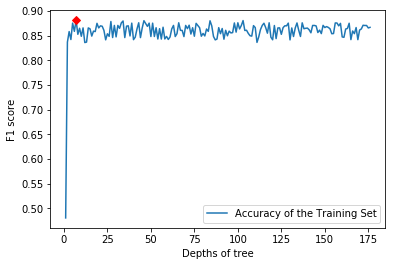

Maximum F1 score is for k = 7 with score of 0.881579259520436 .


In [73]:
from sklearn import tree

def dt_classifier(d_in, data_in, label_in):
    """
    :purpose: This function creates an Decision tree classifier
    and calculates its training and test accuracy.
    :param d_in: depth of tree
    :param data_in: training dataset
    :param label_in: true answers for the training dataset
    :return: the accuracy of the model on training set
    """
    
     # creating the KNN classifier
    clf_dt = tree.DecisionTreeClassifier(max_depth=d_in)
    
    # cross validation 
    train_result = cross_val_score(clf_dt, data_in, 
                                   label_in, cv=K_FOLD, 
                                   scoring='f1_macro')
    
    # return mean of f1 score
    return train_result.mean()

# saving accuracy for different K
training_accuracy = list()

# range of K for dt
depths = range(1, len(data)-1)

for d in depths:
    result = dt_classifier(d, data, labels)
    training_accuracy.append(result)
    
# plotting result
plt.plot(depths, training_accuracy,
         label='Accuracy of the Training Set')

# highlighting maximum point
max_point = max(training_accuracy)
max_k = training_accuracy.index(max_point) + 1
plt.plot(max_k, max_point, 'rD')
plt.ylabel('F1 score')
plt.xlabel('Depths of tree')
plt.legend()
plt.show()

print('Maximum F1 score is for k =', max_k, 'with score of', max_point, '.')

#### Decision Tree Classifier

In [74]:
clf_dt = tree.DecisionTreeClassifier(max_depth=max_k)

# cross validation 
result = cross_val_score(clf_dt, data, 
                        labels, cv=K_FOLD, 
                        scoring='f1_macro')
# accuracy
acc = cross_val_score(clf_dt, data, 
                      labels, cv=K_FOLD, 
                      scoring='balanced_accuracy')

# saving answer
models_info['DT'] = {'f1': round(result.mean(), 5),
                      'std': round(result.std(), 5),
                      'acc': round(acc.mean(), 5)}

# printing result in tabular format
print('\033[1m' + 'Decision Tree classifier' + '\033[0m')
print('{:<15} {:<15} {:<15}'.format('F1-score Mean',
                                    'F1-score STD',
                                    'Accuracy'))

print('{:<15} {:<15} {:<15}'.format(models_info['DT']['f1'], 
                                    models_info['DT']['std'],
                                    models_info['DT']['acc']))

Decision Tree classifier
F1-score Mean   F1-score STD    Accuracy       
0.87037         0.09265         0.86492        


### Comparison

In [75]:
# printing result in tabular format
print('\033[1m' + 'Classifiers Summary' + '\033[0m')
print('{:<20} {:<15} {:<15} {:<15}'.format('Classifier',
                                    'F1-score Mean',
                                    'F1-score STD',
                                    'Accuracy'))

print('{:<20} {:<15} {:<15} {:<15}'.format('K Nearest Neighbors',
                                    models_info['KNN']['f1'], 
                                    models_info['KNN']['std'],
                                    models_info['KNN']['acc']))

print('{:<20} {:<15} {:<15} {:<15}'.format('Naive Bayes',
                                    models_info['NB']['f1'], 
                                    models_info['NB']['std'],
                                    models_info['NB']['acc']))

print('{:<20} {:<15} {:<15} {:<15}'.format('Decision Tree',
                                    models_info['DT']['f1'], 
                                    models_info['DT']['std'],
                                    models_info['DT']['acc']))

Classifiers Summary
Classifier           F1-score Mean   F1-score STD    Accuracy       
K Nearest Neighbors  0.72657         0.10744         0.73409        
Naive Bayes          0.97831         0.02659         0.97937        
Decision Tree        0.87037         0.09265         0.86492        


Discuss the performance of the three classifiers. Which, if any, would you choose as the best model for
the data?
> As we can see, *Naive Bayes* have the most f1-score and Accuracy. So I would pick the *Naive Bayes* classifier.